<a href="https://colab.research.google.com/github/AndreaLeylavergne/international_markets/blob/main/USA_WTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

# Charging libs and preparing the notebook


In [11]:
import numpy as np
import pandas as pd
import shutil
import json
import tqdm
from IPython.display import clear_output
from wordcloud import WordCloud
from collections import Counter
import random

import  time, random
from IPython.display import clear_output
import seaborn as sns
import glob
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.collections import LineCollection

import seaborn as sns

import missingno as msno
import altair as alt

import scipy
import scipy.stats
from scipy import stats
from scipy.stats import zscore
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
import zipfile
import warnings
warnings.filterwarnings('ignore')



In [8]:
# On 'charge' seaborn :
sns.set()

# EDA

In [57]:
# Unzipping and extracting the newly uploaded file to see its contents.
new_zip_file_path = '/content/gdrive/MyDrive/Colab Notebooks/Taxes_countries/wits_en_at-a-glance_allcountries_allyears.zip'
extracted_new_folder_path = '/content/gdrive/MyDrive/Colab Notebooks/Taxes_countries/unzipped/wits_en_at-a-glance_extracted/'

# Extract the zip file
with zipfile.ZipFile(new_zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_new_folder_path)

# List the extracted files to understand the structure
extracted_new_files = os.listdir(extracted_new_folder_path)
extracted_new_files


['en_ABW_At-a-Glance.csv',
 'en_AFG_At-a-Glance.csv',
 'en_AGO_At-a-Glance.csv',
 'en_AIA_At-a-Glance.csv',
 'en_ALB_At-a-Glance.csv',
 'en_AND_At-a-Glance.csv',
 'en_ANT_At-a-Glance.csv',
 'en_ARE_At-a-Glance.csv',
 'en_ARG_At-a-Glance.csv',
 'en_ARM_At-a-Glance.csv',
 'en_ATG_At-a-Glance.csv',
 'en_AUS_At-a-Glance.csv',
 'en_AUT_At-a-Glance.csv',
 'en_AZE_At-a-Glance.csv',
 'en_BDI_At-a-Glance.csv',
 'en_BEL_At-a-Glance.csv',
 'en_BEN_At-a-Glance.csv',
 'en_BFA_At-a-Glance.csv',
 'en_BGD_At-a-Glance.csv',
 'en_BGR_At-a-Glance.csv',
 'en_BHR_At-a-Glance.csv',
 'en_BHS_At-a-Glance.csv',
 'en_BIH_At-a-Glance.csv',
 'en_BLR_At-a-Glance.csv',
 'en_BLX_At-a-Glance.csv',
 'en_BLZ_At-a-Glance.csv',
 'en_BMU_At-a-Glance.csv',
 'en_BOL_At-a-Glance.csv',
 'en_BRA_At-a-Glance.csv',
 'en_BRB_At-a-Glance.csv',
 'en_BRN_At-a-Glance.csv',
 'en_BTN_At-a-Glance.csv',
 'en_BWA_At-a-Glance.csv',
 'en_CAA_At-a-Glance.csv',
 'en_CAF_At-a-Glance.csv',
 'en_CAN_At-a-Glance.csv',
 'en_CEA_At-a-Glance.csv',
 

In [61]:
# Load the USA "At-a-Glance" file for analysis
usa_at_a_glance_file = os.path.join(extracted_new_folder_path, 'en_USA_At-a-Glance.csv')

# Read the data
usa_at_a_glance_data = pd.read_csv(usa_at_a_glance_file)

# Display the first few rows to understand the structure
usa_at_a_glance_data.head()


,Reporter,Year,Partner,Product categories,Indicator Type,Indicator,Indicator Value
0,United States,2021.0,Canada,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,306926.753196
1,United States,2021.0,Mexico,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,276458.852053
2,United States,2021.0,China,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,151065.177394
3,United States,2021.0,Japan,All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,74960.699147
4,United States,2021.0,"Korea, Rep.",All Products,Export,Trade (US$ Mil)-Top 5 Export Partner,65769.493507


In [59]:
usa_at_a_glance_data.shape

(100, 7)

In [62]:
print(usa_at_a_glance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reporter            100 non-null    object 
 1   Year                99 non-null     float64
 2   Partner             100 non-null    object 
 3   Product categories  100 non-null    object 
 4   Indicator Type      100 non-null    object 
 5   Indicator           100 non-null    object 
 6   Indicator Value     100 non-null    float64
dtypes: float64(2), object(5)
memory usage: 5.6+ KB
None


In [63]:
usa_at_a_glance_data.nunique()

,0
Reporter,1
Year,7
Partner,8
Product categories,22
Indicator Type,5
Indicator,36
Indicator Value,99


In [65]:
usa_at_a_glance_data.isna()

,Reporter,Year,Partner,Product categories,Indicator Type,Indicator,Indicator Value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


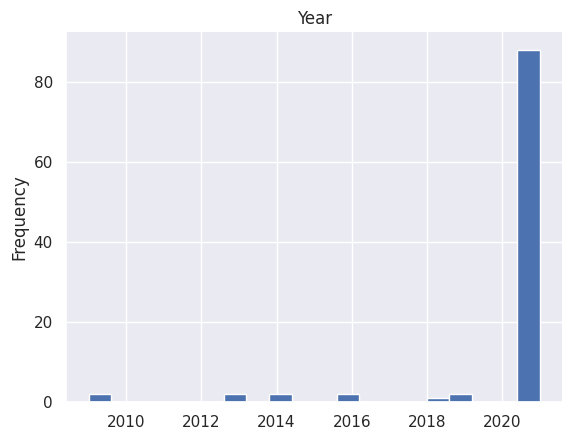

In [54]:
# @title Year

from matplotlib import pyplot as plt
usa_at_a_glance_data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

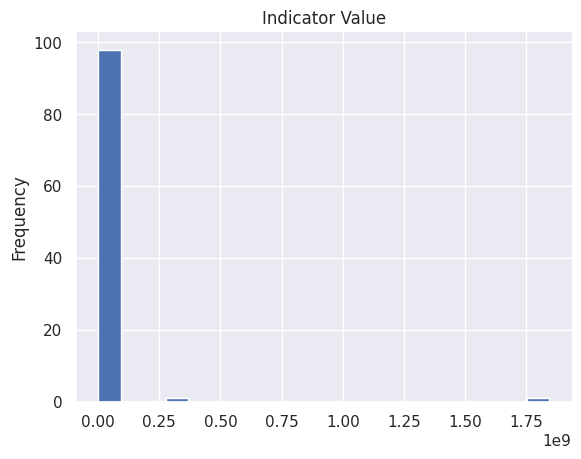

In [52]:
# @title Indicator Value

from matplotlib import pyplot as plt
usa_at_a_glance_data['Indicator Value'].plot(kind='hist', bins=20, title='Indicator Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

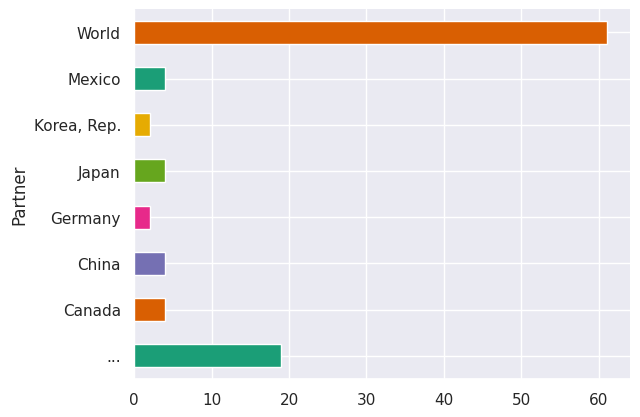

In [50]:
# @title Partner

from matplotlib import pyplot as plt
import seaborn as sns
usa_at_a_glance_data.groupby('Partner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

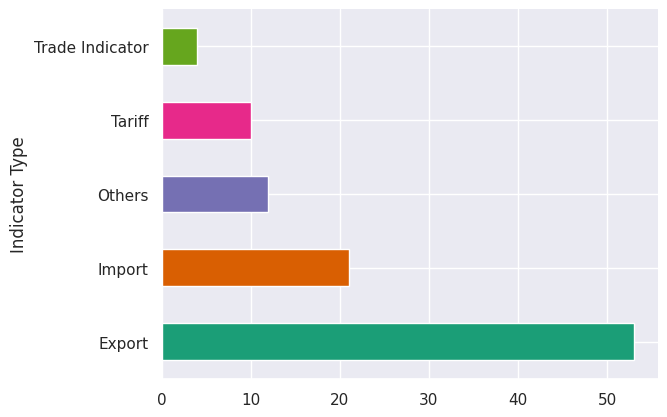

In [48]:
# @title Indicator Type

from matplotlib import pyplot as plt
import seaborn as sns
usa_at_a_glance_data.groupby('Indicator Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

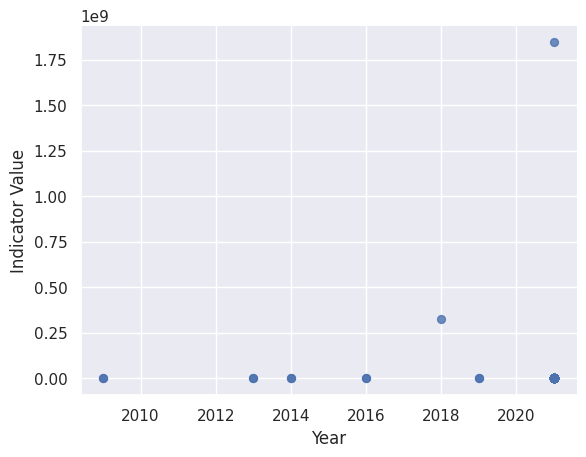

In [46]:
# @title Year vs Indicator Value

from matplotlib import pyplot as plt
usa_at_a_glance_data.plot(kind='scatter', x='Year', y='Indicator Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

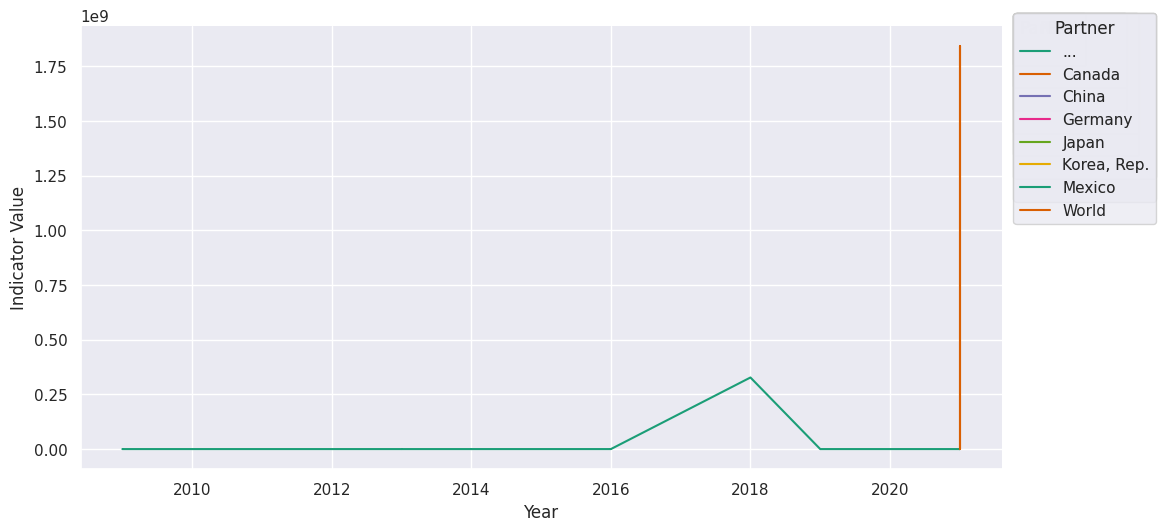

In [44]:
# @title Year vs Indicator Value

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Indicator Value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = usa_at_a_glance_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Partner')):
  _plot_series(series, series_name, i)
  fig.legend(title='Partner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Indicator Value')

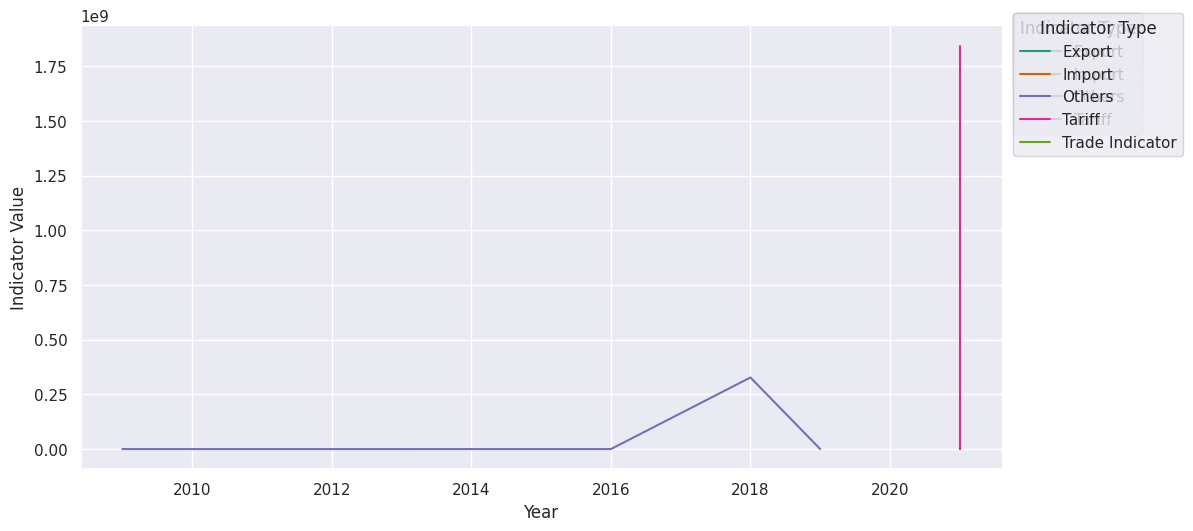

In [42]:
# @title Year vs Indicator Value

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Indicator Value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = usa_at_a_glance_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicator Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicator Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Indicator Value')

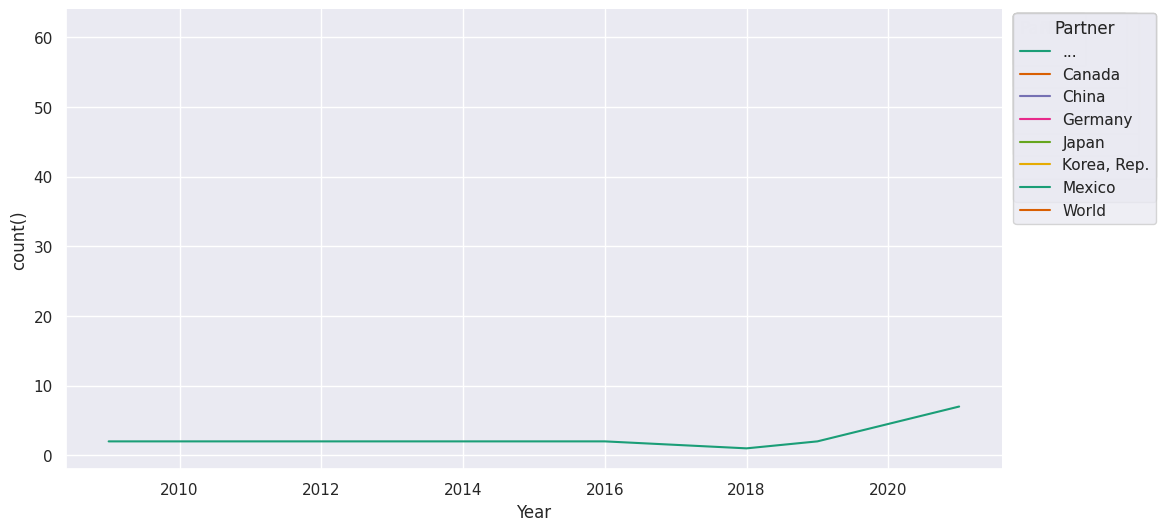

In [40]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = usa_at_a_glance_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Partner')):
  _plot_series(series, series_name, i)
  fig.legend(title='Partner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

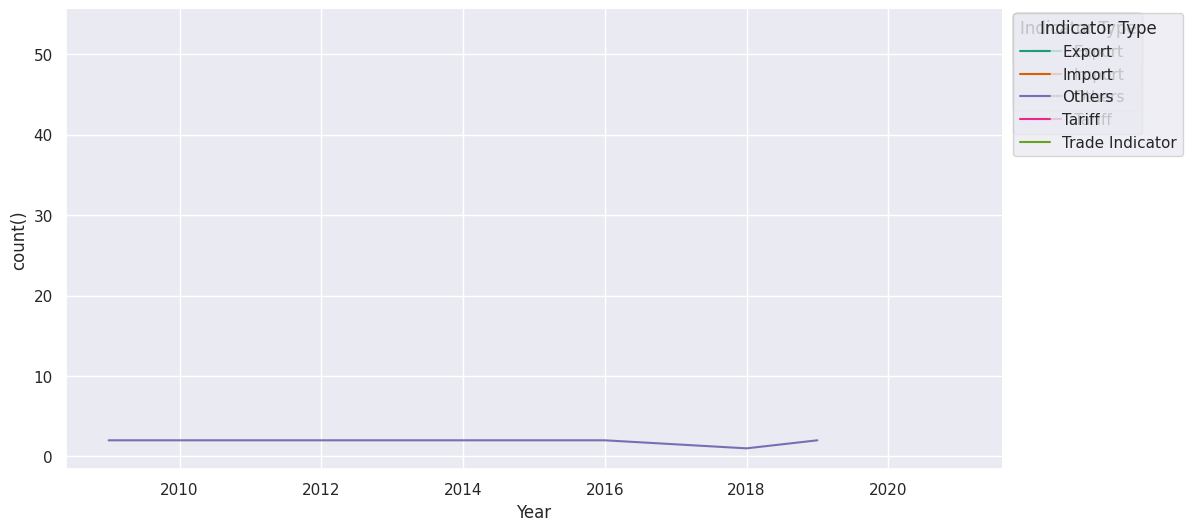

In [38]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = usa_at_a_glance_data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicator Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicator Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

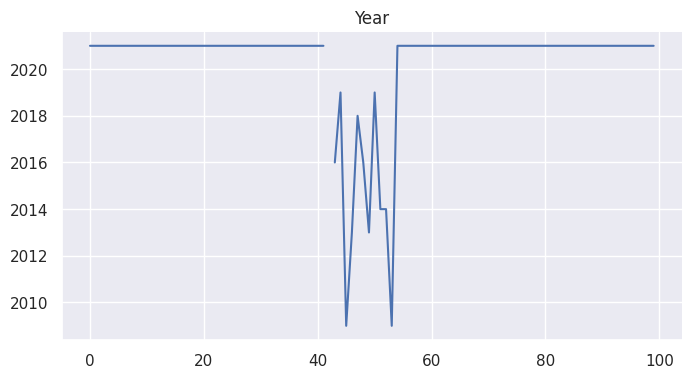

In [37]:
# @title Year

from matplotlib import pyplot as plt
usa_at_a_glance_data['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

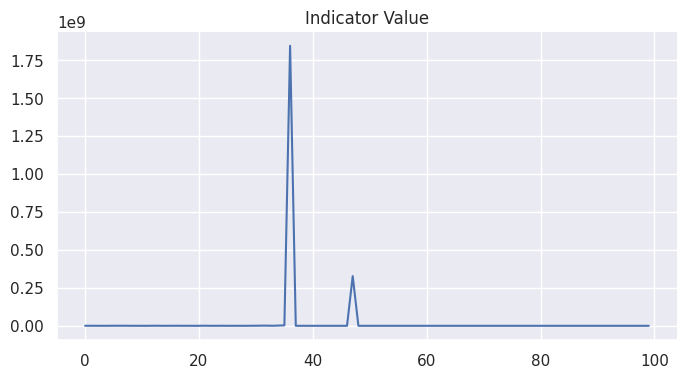

In [35]:
# @title Indicator Value

from matplotlib import pyplot as plt
usa_at_a_glance_data['Indicator Value'].plot(kind='line', figsize=(8, 4), title='Indicator Value')
plt.gca().spines[['top', 'right']].set_visible(False)

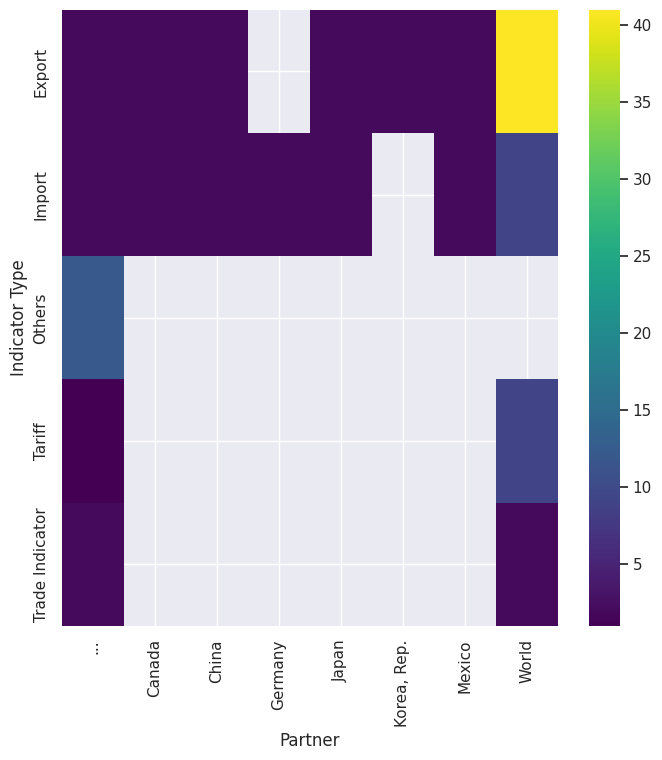

In [32]:
# @title Partner vs Indicator Type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Indicator Type'].value_counts()
    for x_label, grp in usa_at_a_glance_data.groupby('Partner')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Partner')
_ = plt.ylabel('Indicator Type')

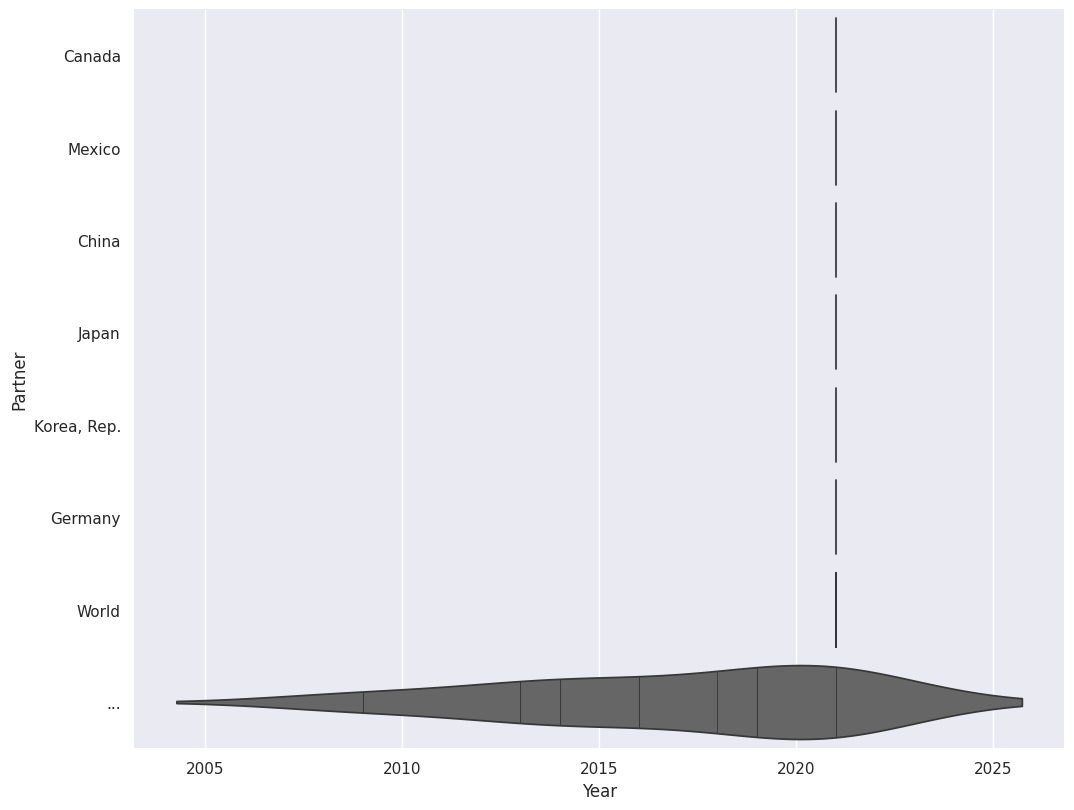

In [30]:
# @title Partner vs Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(usa_at_a_glance_data['Partner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(usa_at_a_glance_data, x='Year', y='Partner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

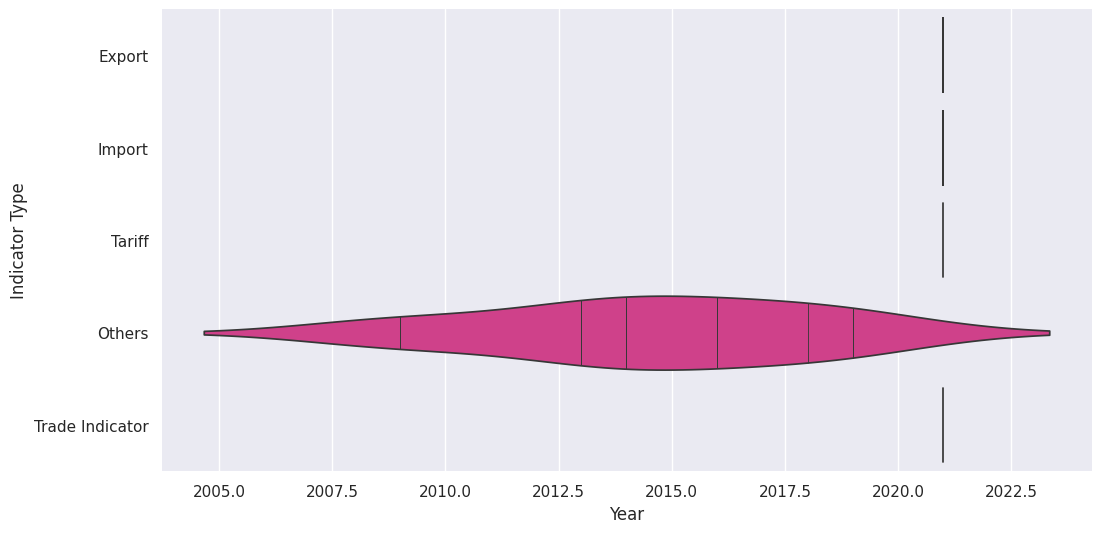

In [28]:
# @title Indicator Type vs Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(usa_at_a_glance_data['Indicator Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(usa_at_a_glance_data, x='Year', y='Indicator Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

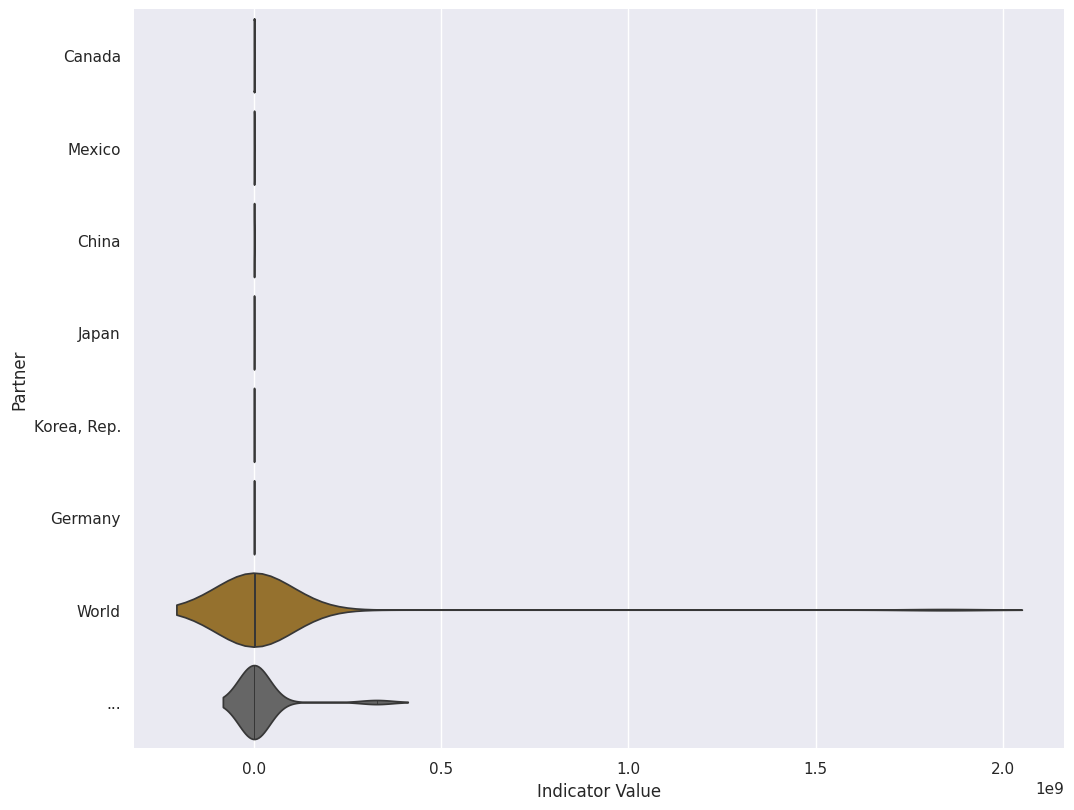

In [26]:
# @title Partner vs Indicator Value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(usa_at_a_glance_data['Partner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(usa_at_a_glance_data, x='Indicator Value', y='Partner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

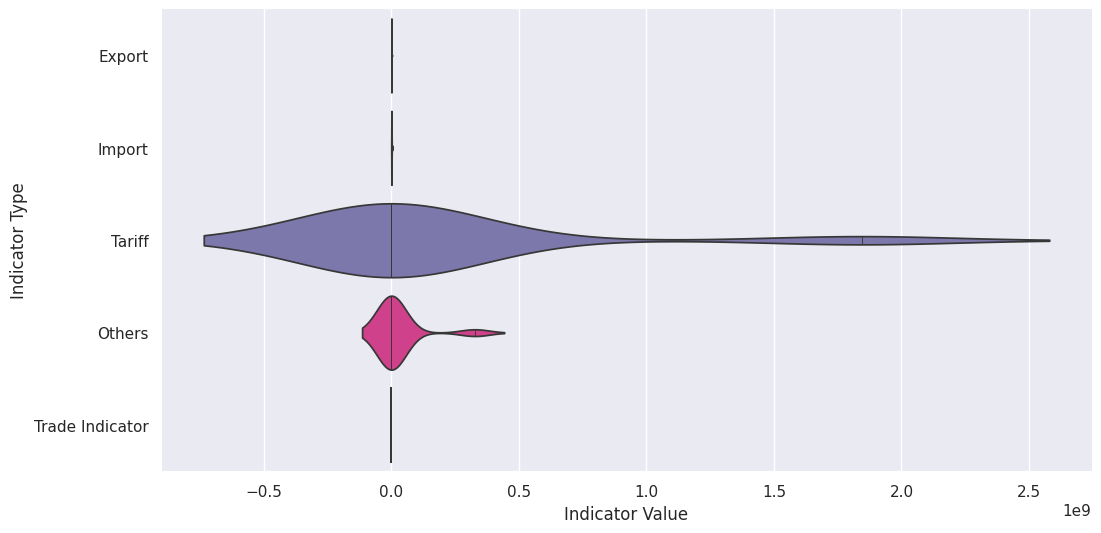

In [24]:
# @title Indicator Type vs Indicator Value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(usa_at_a_glance_data['Indicator Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(usa_at_a_glance_data, x='Indicator Value', y='Indicator Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Showing top USA import partners

In [79]:
# Filter the data to get the top import partners for the USA
usa_import_data = usa_at_a_glance_data[(usa_at_a_glance_data['Indicator Type'] == 'Import') &
                                       (usa_at_a_glance_data['Indicator'].str.contains('Top 5 Import Partner'))]

# Sort the data by Indicator Value to get the top partners
top_usa_import_partners = usa_import_data.sort_values(by='Indicator Value', ascending=False)

# Display the top 5 import partners
top_usa_import_partners[['Partner', 'Year', 'Indicator Value']].head()


,Partner,Year,Indicator Value
5,China,2021.0,541531.352242
6,Mexico,2021.0,388357.522055
7,Canada,2021.0,363904.687514
8,Japan,2021.0,139389.676627
9,Germany,2021.0,138194.629531
